# Data visualization of iris Dataset

this is exploration of iris dataset using python visualizing modules
for more info :- https://en.wikipedia.org/wiki/Iris_(plant)


In [6]:
# importing dapendent libraries
import numpy as np
import pandas as pd

#The subprocess module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes. This module intends to replace several older modules and functions:
# os.system ,os.spawn* ,os.popen* ,popen2.* , commands.*

from subprocess import check_output
%matplotlib inline
import pandas as pd

import warnings # in case due to compatiblity issues posed by the data visualization libraries
import seaborn as sns # graph visualization library
import matplotlib.pyplot as plt
sns.set(style="darkgrid",color_codes = True)

#loading the flower dataset
iris = pd.read_csv("Iris.csv")



In [7]:
#now for checking the dataframe of a particular type of species
iris_ve = iris.loc[iris['Species']== "Iris-versicolor"]
iris_ve.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [8]:
#finding the statistics of species and their count
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

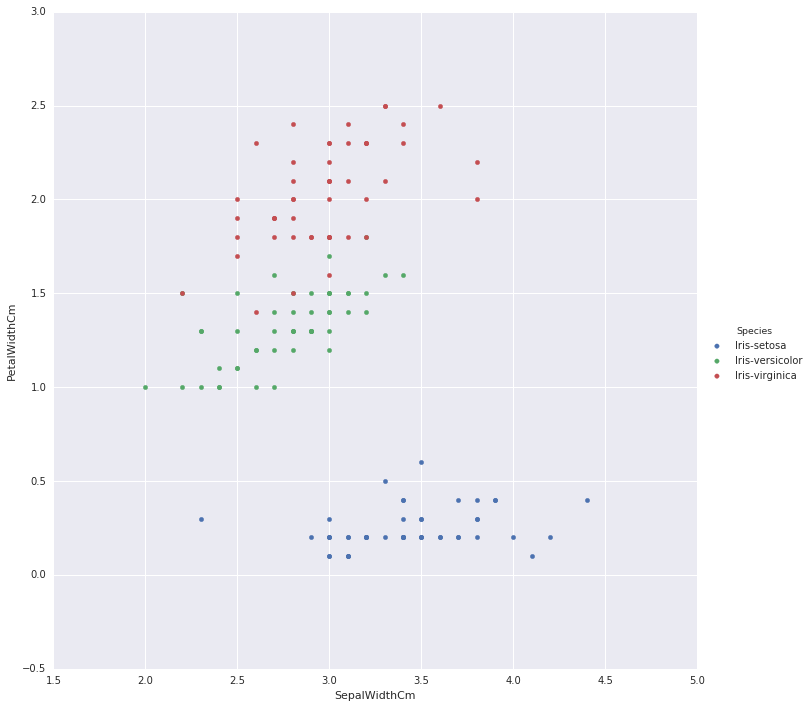

In [12]:
#plotting the species according to the diffrent features displayed by the dataframe

sns.FacetGrid(iris,hue="Species",size = 10)\
   .map(plt.scatter,"SepalWidthCm","PetalWidthCm") \
    .add_legend()


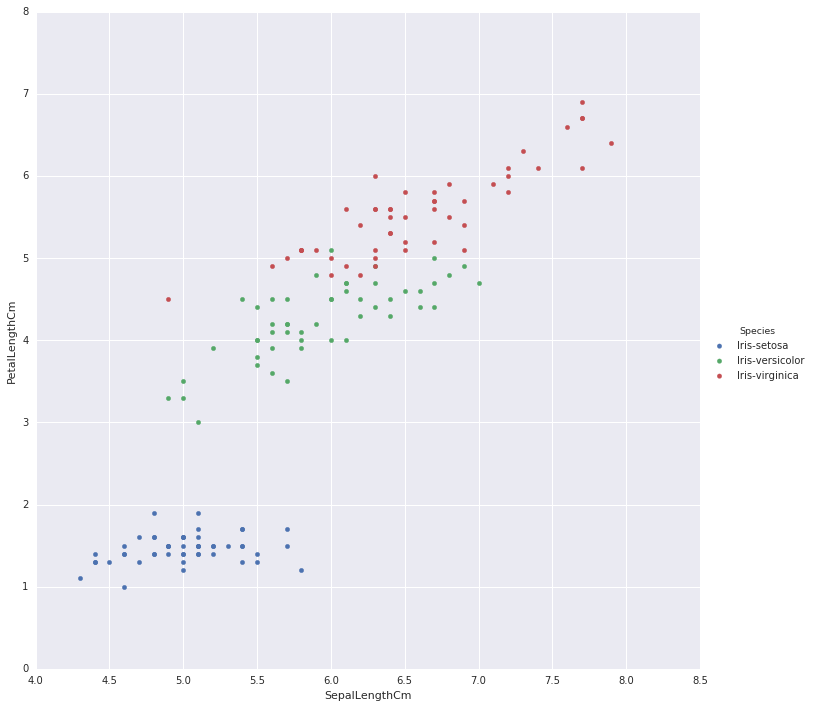

In [13]:
#now plotting between sepal length and petal length

sns.FacetGrid(iris,hue="Species",size = 10)\
   .map(plt.scatter,"SepalLengthCm","PetalLengthCm") \
    .add_legend()


/home/ubuntucool/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  import sys


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

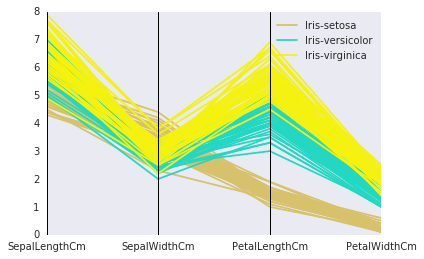

In [15]:
# thus the above two plots shows that sepal and petal length have more linear relation and can be classified 
# now plotting multivariable visualization 
# for more info , comsult https://pandas.pydata.org/pandas-docs/stable/visualization.html

from pandas.tools.plotting import parallel_coordinates
#just plotting the diffrent species accoring to the diffrent features ,one  taken at a time
r = parallel_coordinates(iris.drop("Id",axis=1),"Species")
import matplotlib

r.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
#plotting the figure with the paragraph
ax = df.plot()
fig = ax.get_figure()
fig.savefig('plot.png')

In [26]:
#now using bokeh library to plot bar and plotting diffrent species according  to their color , length 
from bokeh.plotting import figure, output_notebook, show
N = 4000
#x = np.random.random(size=N) * 100
#y = np.random.random(size=N) * 100
x = iris.PetalLengthCm
y = iris.SepalLengthCm
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]
output_notebook()

Plots="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"
p = figure(tools=Plots)
p.scatter(x,y,radius=0.02, fill_alpha=0.9,line_color=None)
#just testing the plotting of the Petal length and sepal length ( although quite odd)
show(p)

Loading BokehJS ...

In [27]:
#showing histogram plot  having the count of species according to length


from bokeh.charts import Histogram

hist = Histogram(iris, values="PetalLengthCm", color="Species", legend="top_right", bins=12)

show(hist)



/usr/local/lib/python3.5/dist-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


In [29]:


from bokeh.charts import Bar, output_file, show

p = Bar(iris, label='PetalLengthCm', values='PetalWidthCm', agg='median', group='Species',
        title="Y = Median PetalWidthCm  X  PetalLengthCm, grouped by Species", legend='top_right')


show(p)



# traning model on  iris data-set using knn classifier to predict the species using there features

In [2]:
#here we will be using the sklearn library  which has prebuild many machine learning  methods and datasets
from sklearn.datasets import load_iris

iris = load_iris()
#store the values of data in X 
X = iris.data

# store  the output trained answers in Y
y = iris.target

In [7]:
#importing the knn clasifier function

from sklearn.neighbors import KNeighborsClassifier

# now we will "Instantiate" the "estimator"
#where
# "Estimator" is scikit-learn's term for model
# "Instantiate" means "make an instance of"


knn = KNeighborsClassifier(n_neighbors=1)


print(knn)
# now fiiting the input ufeatures and observed outputs and fitting the data 
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
#Now for predicting the outputs , passing the matrix of values


X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)




array([2, 1])